# Gender Classification Model

## 1. Investigating dataset

In [2]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import random

D:\Documents\Personal Projects\Age_Predictor\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds = load_dataset("myvision/gender-classification")

In [3]:
labels = ds["train"].features["label"].names
label_mapping = {i: v for i, v in enumerate(labels)}
label_mapping

{0: 'female', 1: 'male'}

In [4]:
train_ds = ds["train"]
val_ds = ds["eval"]
test_ds = ds["test"]
print(f"Train: {len(train_ds)}")
print(f"Validation: {len(val_ds)}")
print(f"Test: {len(test_ds)}")

Train: 5000
Validation: 1000
Test: 1000


In [5]:
train_ds[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 'label': 0}

In [6]:
train_ds[0]["label"], train_ds[0]["image"]

(0, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>)

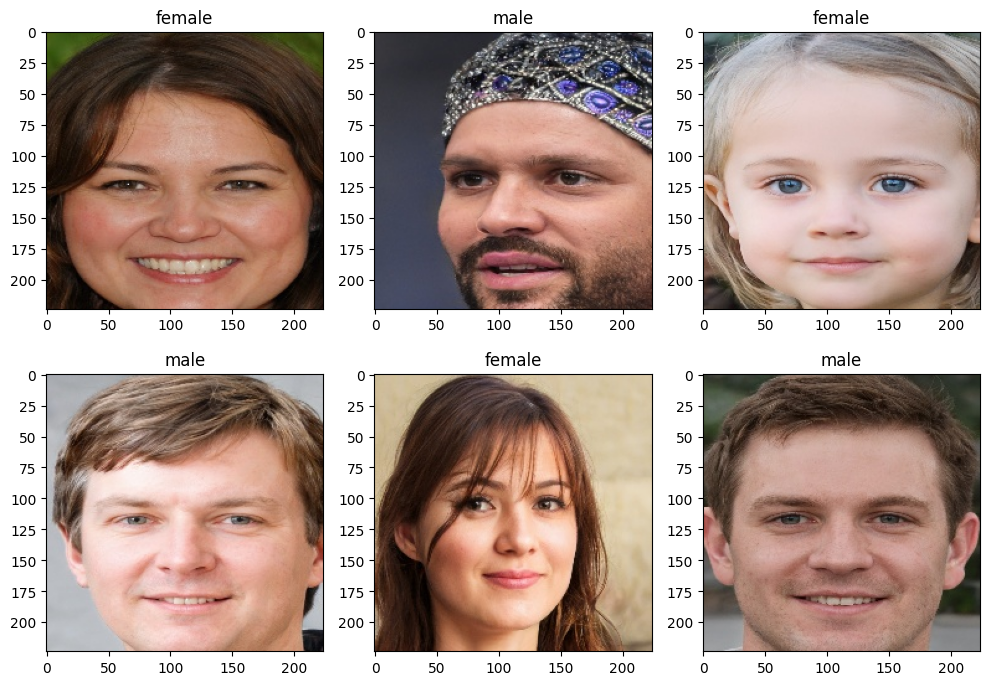

In [7]:
def print_samples():
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
    axes = axes.flatten()
    ind = random.sample(range(len(train_ds)), 1)[0]
    for ax in axes:
        ax.imshow(train_ds[ind]['image'])
        ax.set_title(label_mapping[train_ds[ind]['label']])
        ind = random.sample(range(len(train_ds)), 1)[0]
    plt.tight_layout()  # Adjust the layout to prevent titles and labels from overlapping
    plt.show()
print_samples()

### Structure dataset folder for YOLO

In [8]:
import os
from tqdm import tqdm
ROOT = "./"
DATA_ROOT = os.path.join(ROOT, "dataset", "gender")
os.makedirs(DATA_ROOT, exist_ok=True)

for split in ['train', 'eval', 'test']:
    if split == 'eval':
        split_dir = os.path.join(DATA_ROOT, 'val')
    else:
        split_dir = os.path.join(DATA_ROOT, split)
    os.makedirs(split_dir, exist_ok=True)

    for idx, example in tqdm(enumerate(ds[split]), total=len(ds[split]), desc=f"Processing {split} split..."):
        pil_image = example['image']
        label = label_mapping[example['label']]

        # Create a directory for this class if it doesn't exist
        class_dir = os.path.join(split_dir, label)
        os.makedirs(class_dir, exist_ok=True)

        # Save this image to the class directory
        image_filename = f"{idx}_{label}.png"
        image_path = os.path.join(class_dir, image_filename)
        pil_image.save(image_path)

Processing test split...: 100%|██████████| 1000/1000 [00:05<00:00, 169.70it/s]


# 2. Setup Model and Training Configurations

In [3]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-cls.pt")

In [5]:
import os
ROOT = "./"
DATA_ROOT = os.path.join(ROOT, "dataset", "gender")

In [6]:
# Train the model
results = model.train(
    data=DATA_ROOT,
    epochs=10,
    imgsz=64,
    device=0,
    save=True,
    save_period=1,                  # Save checkpoint every 10 epochs
    project="Gender_Detection",     # Name of the project directory where training outputs are saved.
    name="v1_epochs_10_imgsz_64",   # Name of the training run.
    dropout=0.1,
    plots=True                      # Generates and saves plots of training, validation metrics, and prediction examples.
)


New https://pypi.org/project/ultralytics/8.3.189 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.185  Python-3.10.3 torch-2.8.0+cu126 CUDA:0 (NVIDIA GeForce GTX 1660, 6144MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=D:\Documents\Personal Projects\Age_Predictor\dataset, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=64, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=v1_epochs_10_img

train: Scanning D:\Documents\Personal Projects\Age_Predictor\dataset\train... 5000 images, 0 corrupt: 100%|██████████| 5000/5000 [00:04<00:00, 1020.12it/s]


train: New cache created: D:\Documents\Personal Projects\Age_Predictor\dataset\train.cache
val: Fast image access  (ping: 0.20.2 ms, read: 13.31.8 MB/s, size: 82.0 KB)


val: Scanning D:\Documents\Personal Projects\Age_Predictor\dataset\val... 1000 images, 0 corrupt: 100%|██████████| 1000/1000 [00:01<00:00, 988.74it/s]

val: New cache created: D:\Documents\Personal Projects\Age_Predictor\dataset\val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
Image sizes 64 train, 64 val
Using 8 dataloader workers
Logging results to Gender_Detection\v1_epochs_10_imgsz_64
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/10     0.121G     0.6599         16         64:  29%|██▉       | 90/313 [00:05<00:11, 18.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:00<00:00, 70.46it/s]

                   all       0.84          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:00<00:00, 84.20it/s]

                   all      0.895          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:00<00:00, 86.23it/s]

                   all      0.929          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:00<00:00, 84.16it/s]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:00<00:00, 91.76it/s]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:00<00:00, 87.68it/s]

                   all      0.943          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:00<00:00, 82.24it/s]


                   all       0.95          1

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:00<00:00, 85.59it/s]

                   all      0.956          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:00<00:00, 84.96it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10     0.199G     0.1674          8         64: 100%|██████████| 313/313 [00:11<00:00, 28.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:00<00:00, 79.59it/s]

                   all      0.952          1



10 epochs completed in 0.042 hours.
Optimizer stripped from Gender_Detection\v1_epochs_10_imgsz_64\weights\last.pt, 3.2MB
Optimizer stripped from Gender_Detection\v1_epochs_10_imgsz_64\weights\best.pt, 3.2MB

Validating Gender_Detection\v1_epochs_10_imgsz_64\weights\best.pt...
Ultralytics 8.3.185  Python-3.10.3 torch-2.8.0+cu126 CUDA:0 (NVIDIA GeForce GTX 1660, 6144MiB)
YOLO11n-cls summary (fused): 47 layers, 1,528,586 parameters, 0 gradients, 3.2 GFLOPs
train: D:\Documents\Personal Projects\Age_Predictor\dataset\train... found 5000 images in 2 classes  
val: D:\Documents\Personal Projects\Age_Predictor\dataset\val... found 1000 images in 2 classes  
test: D:\Documents\Personal Projects\Age_Predictor\dataset\test... found 1000 images in 2 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:00<00:00, 94.80it/s] 


                   all      0.956          1
Speed: 0.0ms preprocess, 0.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to Gender_Detection\v1_epochs_10_imgsz_64


### Test Performance

In [ ]:
# !pip install scikit-learn seaborn

In [1]:
from ultralytics import YOLO

model_path = r"./Gender_Detection/v1_epochs_10_imgsz_64/weights/best.pt"
model = YOLO(model_path)  # load a custom model

In [2]:
import os
from tqdm import tqdm

test_dir = os.path.join("../dataset", "gender", "test")
genders = list(os.listdir(test_dir))

results = {}
for gender in tqdm(genders):
    image_path = os.path.join(test_dir, gender)
    results[gender] = model(image_path, verbose=False)

100%|██████████| 2/2 [00:16<00:00,  8.45s/it]


In [3]:
results["male"][0]

ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'female', 1: 'male'}
obb: None
orig_img: array([[[110, 139, 154],
        [110, 139, 154],
        [110, 139, 154],
        ...,
        [116, 143, 153],
        [115, 144, 153],
        [114, 143, 152]],

       [[108, 137, 152],
        [109, 138, 153],
        [109, 138, 153],
        ...,
        [116, 143, 153],
        [114, 143, 152],
        [113, 142, 151]],

       [[108, 137, 152],
        [109, 138, 153],
        [110, 139, 154],
        ...,
        [117, 143, 155],
        [115, 143, 154],
        [113, 141, 152]],

       ...,

       [[109, 138, 152],
        [109, 138, 152],
        [113, 141, 152],
        ...,
        [ 51,  55,  44],
        [ 44,  49,  40],
        [ 51,  56,  47]],

       [[107, 136, 150],
        [107, 136, 150],
        [111, 139, 150],
        ...,
        [ 45,  50,  41],
        [ 47,  51,  45],
        [ 79,  83,  77]],

       [[1

In [4]:
images = []
true_labels = []
predicted_labels = []

mapping = results["male"][0].names

for gender in genders:
    for result in results[gender]:
        img_path = result.path

        img_name = os.path.basename(img_path)
        images.append(img_name)

        true_label = img_name.split("_")[-1].split(".")[0]
        true_labels.append(true_label)

        label_index = result.probs.top1
        predicted_label = mapping[label_index]
        predicted_labels.append(predicted_label)


Overall Model Accuracy: 0.9250

--- Classification Report ---
              precision    recall  f1-score   support

      female       0.94      0.91      0.92       500
        male       0.91      0.94      0.93       500

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.92      1000
weighted avg       0.93      0.93      0.92      1000


Generating Confusion Matrix...


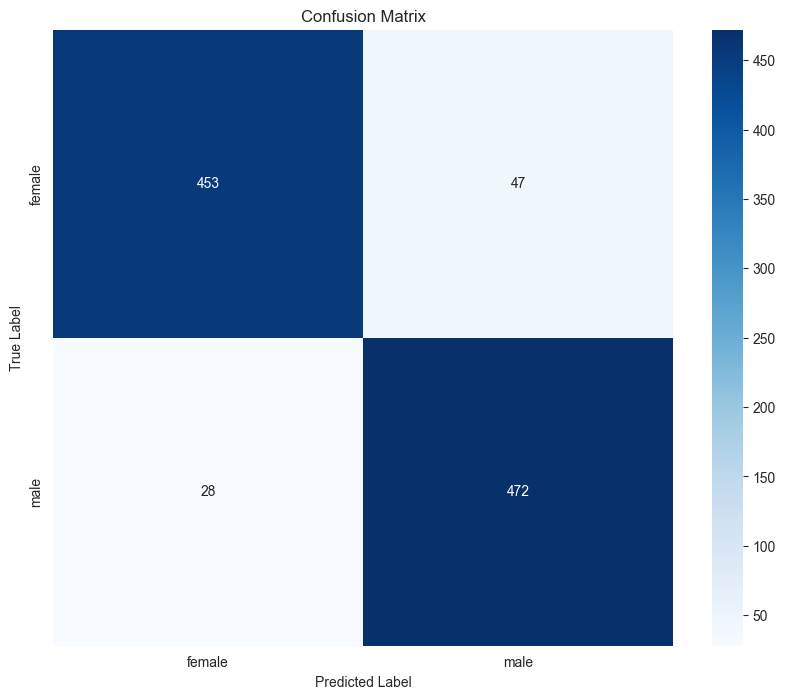


--- Evaluation Complete ---


In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names = list(mapping.values())

# Accuracy is a great top-level metric to see overall correctness.
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"\nOverall Model Accuracy: {accuracy:.4f}")

# A classification report provides a more detailed breakdown per class.
# It shows precision, recall, and F1-score for each class.
print("\n--- Classification Report ---")
print(classification_report(true_labels, predicted_labels, target_names=class_names))

# --- Step 3: Visualize with a Confusion Matrix ---
# The confusion matrix provides a visual representation of the performance.
# Each row represents the true class, and each column represents the predicted class.
# This helps identify which classes the model is confusing with others.
print("\nGenerating Confusion Matrix...")
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\n--- Evaluation Complete ---")

In [45]:
test_dir = os.path.join(DATA_ROOT, "test")
test_female_images = os.path.join(test_dir, "female")
test_male_images = os.path.join(test_dir, "male")

results_female = model(test_female_images)
results_male = model(test_male_images)


image 1/500 D:\Documents\Personal Projects\Age_Predictor\dataset\test\female\0_female.png: 64x64 female 1.00, male 0.00, 7.1ms
image 2/500 D:\Documents\Personal Projects\Age_Predictor\dataset\test\female\100_female.png: 64x64 female 0.99, male 0.01, 8.9ms
image 3/500 D:\Documents\Personal Projects\Age_Predictor\dataset\test\female\101_female.png: 64x64 female 1.00, male 0.00, 6.9ms
image 4/500 D:\Documents\Personal Projects\Age_Predictor\dataset\test\female\102_female.png: 64x64 female 1.00, male 0.00, 6.8ms
image 5/500 D:\Documents\Personal Projects\Age_Predictor\dataset\test\female\103_female.png: 64x64 female 1.00, male 0.00, 6.9ms
image 6/500 D:\Documents\Personal Projects\Age_Predictor\dataset\test\female\104_female.png: 64x64 female 1.00, male 0.00, 7.1ms
image 7/500 D:\Documents\Personal Projects\Age_Predictor\dataset\test\female\105_female.png: 64x64 female 0.96, male 0.04, 9.7ms
image 8/500 D:\Documents\Personal Projects\Age_Predictor\dataset\test\female\106_female.png: 64x64

In [51]:
results_female[0].names

{0: 'female', 1: 'male'}

In [52]:
from tqdm import tqdm

correct_female = 0
total_female = len(list(os.listdir(test_female_images)))
correct_male = 0
total_male = len(list(os.listdir(test_male_images)))

mapping = results_female[0].names

for result in tqdm(results_female, total=total_female, desc=f"Calculating female accuracy..."):
    label_index = result.probs.top1
    label = mapping[label_index]
    if label == "female":
        correct_female += 1

for result in tqdm(results_male, total=total_male, desc=f"Calculating male accuracy..."):
    label_index = result.probs.top1
    label = mapping[label_index]
    if label == "male":
        correct_male += 1

print(f"Female: {correct_female}/{total_female} - {correct_female/total_female * 100:.2f}%")
print(f"Male: {correct_male}/{total_male} - {correct_male/total_male * 100:.2f}%")


Calculating male accuracy...: 100%|██████████| 500/500 [00:00<00:00, 6791.69it/s]

Female: 453/500 - 90.60%
Male: 472/500 - 94.40%
